In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display, 
import joblib
from sklearn.metrics import mean_absolute_error, r2_score
from pmdarima import auto_arima
plt.style.use('ggplot')

In [8]:
df = pd.read_parquet('../data/processed/production_clean.parquet')
model = joblib.load('../models/best_model.joblib')
train = pd.read_parquet('../data/processed/train.parquet')
test = pd.read_parquet('../data/processed/test.parquet')

In [62]:
y_test = test["cheese"]
y_train = train["cheese"]


X_test = test.drop(columns=["cheese", "date"])
idx = X_test.columns.get_loc("cheese_revenue")
cols_to_drop = X_test.columns[idx:]
X_test = X_test.drop(columns=cols_to_drop)

X_train = train.drop(columns=["cheese", "date"])
idx = X_train.columns.get_loc("cheese_revenue")
cols_to_drop = X_train.columns[idx:]
X_train = X_train.drop(columns=cols_to_drop)


In [64]:
model = auto_arima(y = y_train,
                   x = X_train,
                   m = 12)


n_periodos = len(y_test)
forecast = model.predict(n_periods=12, X=X_test)

forecast

/home/guilherme/Documentos/Cooperativa/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/guilherme/Documentos/Cooperativa/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/guilherme/Documentos/Cooperativa/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/guilherme/Documentos/Cooperativa/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/guilherme/Documentos/Cooperativa/venv/lib/python3.13/site-packages/sklearn/utils/d

47    0.485559
48    0.241126
49    0.119742
50    0.059463
51    0.029529
52    0.014664
53    0.007282
54    0.003616
55    0.001796
56    0.000892
57    0.000443
58    0.000220
dtype: float64

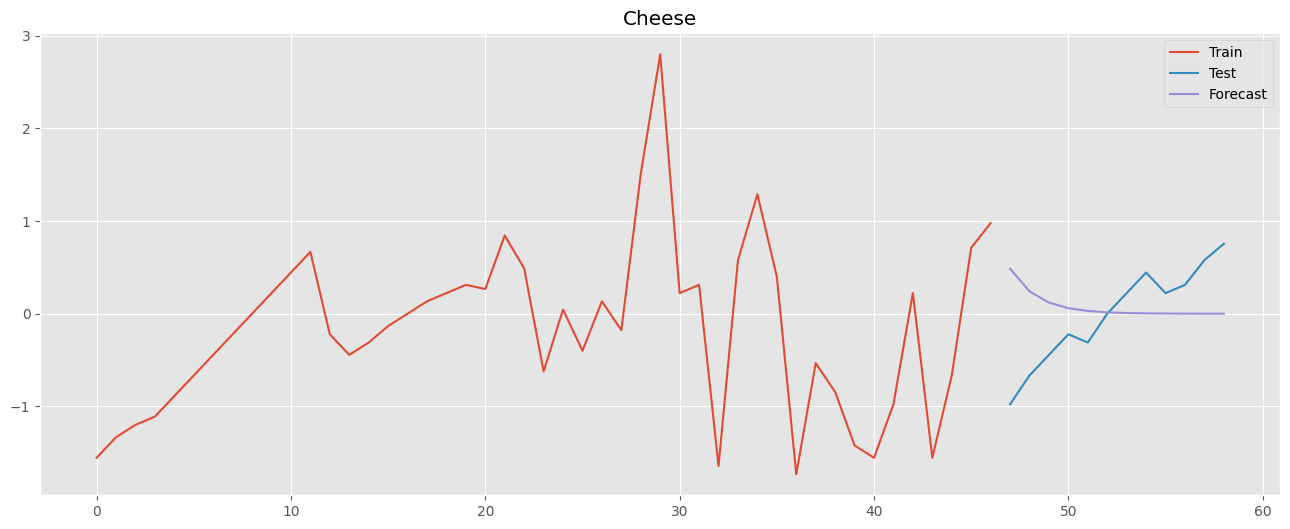

In [66]:
y_train.plot(figsize=(16,6), label='Train')
y_test.plot(label = 'Test')
forecast.plot(label='Forecast')
plt.title('Cheese')
plt.legend()
plt.show()

In [1]:
y_pred = model.predict(n_periods = 10, x=X_test)


NameError: name 'model' is not defined